<a href="https://colab.research.google.com/github/JoeyThirawat/AITech-TitanicFinalProject/blob/main/AI_Final_Project_Group_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import numpy & pandas
import numpy as np
import pandas as pd

# import datasets
import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/AI_project'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/drive/MyDrive/AI_project/train_and_test2.csv
/content/drive/MyDrive/AI_project/test.csv
/content/drive/MyDrive/AI_project/train (1).csv


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# ML model
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, accuracy_score

# dataframe display settings
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 50)

In [ ]:
#Plotly Library:makes interactive, publication-quality graphs. Ex:  line plots, scatter plots, area charts, bar charts...
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.colors import n_colors
from plotly.subplots import make_subplots

# Minmax scaler: Transform features by scaling each feature to a given range
from sklearn.preprocessing import MinMaxScaler

DATA CHECKING:
replace the missing values in "Age" and "Fare" columns with the average values of the respective columns.

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/AI_project/train (1).csv')
test = pd.read_csv('/content/drive/MyDrive/AI_project/test.csv')

#fillna: filling missing values
#describe(): returns description of the data in the DataFrame
train["Age"] = train["Age"].fillna(train.describe()["Age"]["mean"]) 
test["Age"] = test["Age"].fillna(test.describe()["Age"]["mean"])
train['Age']=train['Age'].astype(np.float64)
train["Fare"] = train["Fare"].fillna(train.describe()["Fare"]["mean"])
test["Fare"] = test["Fare"].fillna(test.describe()["Fare"]["mean"])
train['Fare']=train['Fare'].astype(int)
train.head(7)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8,NaN,S
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51,E46,S


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    int64  
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(1), int64(6), object(5)
memory usage: 83.7+ KB


In [ ]:
# men survival 
men = train[train.Sex == 'male']["Survived"]
# women survival 
women = train[train.Sex == 'female']["Survived"]
print("Survival rate for men is {:.2f} and for women is {:.2f}"
      .format((sum(men)/len(men)), (sum(women)/len(women))))

Survival rate for men is 0.19 and for women is 0.74


In [ ]:
data = train
data['Died'] = 1 - data['Survived']

In [ ]:
#figure
fig = go.Figure(data=[
    go.Bar(name='Survived', x=data['Sex'], y=[data[data.Sex==data['Sex'][0]]['Survived'].agg(sum), data[data.Sex==data['Sex'][1]]['Survived'].agg(sum)], marker_color='Red', opacity=0.7),
    go.Bar(name='Died', x=data['Sex'], y=[data[data.Sex==data['Sex'][0]]['Died'].agg(sum), data[data.Sex==data['Sex'][1]]['Died'].agg(sum)], marker_color='Black', opacity=0.7)
])
fig.update_layout(barmode='group', width=500, title_text='Survival chart of male/female', xaxis_title_text='Sex', yaxis_title_text='Num. of passangers')
fig.show()

In [ ]:
#Survival based on Fare, Embarked and Pclass
facet_data = data[['Sex', 'Survived', 'Embarked', 'Pclass', 'Fare']].groupby(['Sex', 'Survived', 'Embarked', 'Pclass']).agg('sum').reset_index()
# .agg() allows you to apply a function or a list of function names to be executed along one of the axis of the DataFrame, default 0, which is the index (row) axis
# Facet plots r figures made up of multiple subplots
fig  = px.bar(facet_data, x='Sex', y='Fare', facet_row='Survived', facet_col='Pclass', color='Embarked', barmode='group')
fig.update_layout(title_text='Passenger survival based on Fare, Embarked and Pclass', width=600)
fig.show()

In [ ]:
data['Survived'] = data['Survived'].astype(str)
fig_scat = px.scatter(data, x='Age', y='Fare', color='Survived', facet_col='Sex')
fig_scat.update_layout(width=600, title_text='Passengers survival based on Sex,Age and Fare', yaxis_title_text='Fare')
fig_scat.show()

#data['Survived'] = data['Survived'].astype(int)

In [ ]:
fig_bar_avgfare = go.Figure()
fig_bar_avgfare.add_trace(go.Bar(x=np.sort(data['Pclass'].unique()), y=data.groupby('Pclass').mean()['Fare'], marker_color=np.sort(data['Pclass'].unique())))
fig_bar_avgfare.update_traces(width=0.3)
fig_bar_avgfare.update_layout(width=600, title_text='Average Fare for Pclass',
                       xaxis_title_text='Pclass', yaxis_title_text='Avg. Fare')
fig_bar_avgfare.show()

In [ ]:
fig_hist = go.Figure()
fig_hist.add_trace(go.Histogram(x=data[data['Died']==1]['Fare'], name='Died', marker_color='black', opacity=0.7))
fig_hist.add_trace(go.Histogram(x=data[data['Survived']==1]['Fare'], name='Survived', marker_color='red', opacity=0.7))
fig_hist.update_layout(barmode='group', title_text='Survived/Died with Fare',
                       xaxis_title_text='Fare', yaxis_title_text='Numb. of Passengers', bargap=0,width=1000)
fig_hist.show()

In [ ]:
#Creating combined dataframe
x_train = train.drop(['Survived', 'Died'], axis=1)
y_train = train['Survived']
x_test = test
#combine the dataframes
data_comb = x_train.append(x_test)
data_comb.shape

(1309, 11)

We'll calculate the family size for each passenger based on the values of "Parch" and "SibSp" and then categorize the individuals based on the value of family size into, Single(for family_size=1), SmallFamily(for family_size=2 to 4) and largeFamily(for family_size=5 to 8).

In [ ]:
#function to create categories based on family size
def fam_size():
  global data_comb
  data_comb['FamilySize'] = data_comb['Parch'] + data_comb['SibSp'] + 1
  #feature to decide family size
  data_comb['Single'] = data_comb['FamilySize'].map(lambda s: 1 if s == 1 else 0)
  data_comb['SmallFamily'] = data_comb['FamilySize'].map(lambda s: 1 if 2 <= s <= 4 else 0)
  data_comb['LargeFamily'] = data_comb['FamilySize'].map(lambda s: 1 if 5 <= s <= 8 else 0)
  return data_comb

In [ ]:
data_comb = fam_size()
data_comb.head(7)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Single,SmallFamily,LargeFamily
0,1,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.0,NaN,S,2,0,1,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.0,C85,C,2,0,1,0
2,3,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.0,NaN,S,1,1,0,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.0,C123,S,2,0,1,0
4,5,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0,NaN,S,1,1,0,0
5,6,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.0,NaN,Q,1,1,0,0
6,7,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.0,E46,S,1,1,0,0


We'll be categorizing the passengers based on the port of embarkation. From the dataset, we know that there are three values in "Embark" column, C(for Cherbourg), Q(for Queenstown) and S(for Southampton). For the missing values in the dataset, we'll assume that these passengers onboarded at the beginning of the journey. Since the Titanic set sail from Southhampton, we'll fill "S" in place of missing values.

In [ ]:
def embark():
  global data_comb
  data_comb['Embarked'].fillna('S', inplace=True)
  data_dummies = pd.get_dummies(data_comb['Embarked'],prefix='Embarked')
  #pd.get_dummies: Convert categorical variable into dummy/indicator variables
  data_comb = pd.concat([data_comb, data_dummies],axis =1)
  #pd.concat: Concatenate pandas objects along a particular axis with optional set logic along the other axes.
  data_comb.drop('Embarked',axis=1, inplace=True) #Drop specified labels
  return data_comb

In [ ]:
data_comb = embark()
data_comb.head(7)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,FamilySize,Single,SmallFamily,LargeFamily,Embarked_C,Embarked_Q,Embarked_S
0,1,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.0,NaN,2,0,1,0,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.0,C85,2,0,1,0,1,0,0
2,3,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.0,NaN,1,1,0,0,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.0,C123,2,0,1,0,0,0,1
4,5,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0,NaN,1,1,0,0,0,0,1
5,6,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.0,NaN,1,1,0,0,0,1,0
6,7,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.0,E46,1,1,0,0,0,0,1


We can see that the cabin columns has values in format of "C123", which means the 123th cabin in the C deck. Let's say everyone from each cabin in a particular deck has equal prob. of survival. For example, B83 and B12 has same chance => we'll just remove the cabin numb and keep the deck. 'U' for unknown values of cabin. Have deck A,B,C,D,E,F,G,T and U.

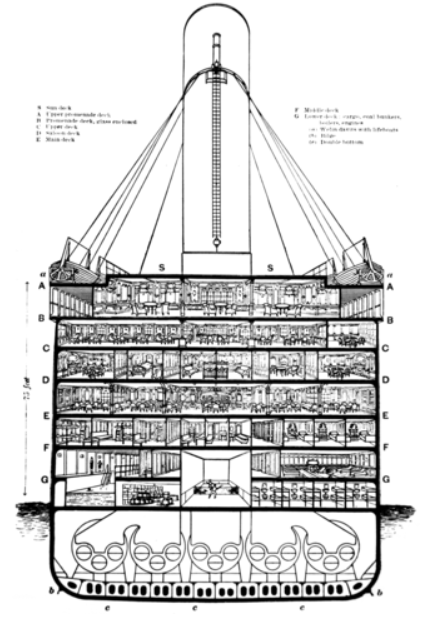

In [ ]:
#function for creating categories based on passenger's cabin
def cabin():
  global data_comb #global variable inside function
  data_comb['Cabin'].fillna('U', inplace=True)
  data_comb['Cabin'] = data_comb['Cabin'].map(lambda ca:ca[0])
  #dummy encoding
  cabin_dummies = pd.get_dummies(data_comb['Cabin'],prefix='Cabin')
  data_comb = pd.concat([data_comb, cabin_dummies], axis=1)
  data_comb.drop('Cabin',inplace=True,axis=1)
  return data_comb

In [ ]:
data_comb = cabin()
data_comb.head(7)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,FamilySize,Single,SmallFamily,LargeFamily,Embarked_C,Embarked_Q,Embarked_S,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U
0,1,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.0,2,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.0,2,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0
2,3,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.0,2,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0
4,5,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1
5,6,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1
6,7,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0


Next step, we'll separate passengers based on age. The range is from 0.4 to 80 years. We'll create to each sets with small range: 0(for less than 11), 1(12 to 18), 2(19 to 22), 3(23 to 27), 4(28 to 33), 5(34 to 46), 6(47 to 66), 7(67 and above).

In [ ]:
#convert age decimal val to int
#convert age range into categories
#.loc: Access a group of rows and columns by label(s) or a boolean array
data_comb.loc[data_comb['Age'] <= 11,'Age'] = 0
data_comb.loc[(data_comb['Age'] > 11) & (data_comb['Age'] <= 18),'Age'] = 1
data_comb.loc[(data_comb['Age'] > 18) & (data_comb['Age'] <= 22),'Age'] = 2
data_comb.loc[(data_comb['Age'] > 22) & (data_comb['Age'] <= 27),'Age'] = 3
data_comb.loc[(data_comb['Age'] > 27) & (data_comb['Age'] <= 33),'Age'] = 4
data_comb.loc[(data_comb['Age'] > 33) & (data_comb['Age'] <= 46),'Age'] = 5
data_comb.loc[(data_comb['Age'] > 46) & (data_comb['Age'] <= 66),'Age'] = 6
data_comb.loc[data_comb['Age'] >= 66,'Age'] = 7
data_comb['Age'] = data_comb['Age'].astype(int)
#distribution
data_comb['Age'].value_counts()

4    442
5    216
3    171
2    140
6    138
1    103
0     90
7      9
Name: Age, dtype: int64

Same as Age, we'll also separate the Fare to smaller sets. 0(less than 7), 1(8 to 14), 2(15 to 31), 3(32 to 99), 4(100 to 250), 5(251 and above).

In [ ]:
#fare to int and into categories
data_comb.loc[data_comb['Fare'] <= 7, 'Fare'] = 0
data_comb.loc[(data_comb['Fare'] > 7) & (data_comb['Fare'] <= 20), 'Fare'] = 1
data_comb.loc[(data_comb['Fare'] > 20) & (data_comb['Fare'] <= 100), 'Fare'] = 2
data_comb.loc[(data_comb['Fare'] > 100) & (data_comb['Fare'] <= 250), 'Fare'] = 3
data_comb.loc[data_comb['Fare'] >= 250, 'Fare'] = 4

data_comb['Fare'] = data_comb['Fare'].astype(int)
data_comb['Fare'].value_counts()

1    511
2    464
0    250
3     67
4     17
Name: Fare, dtype: int64

After that, we'll create categories based on Title of passengers. Like Mr,Mrs,Master,Miss and Rare (old term for royal and rare titles). This is not a straight-forward value which we can analyze mathmatically, as the title of a person wouldn't mean anything to the iceberg that hit Titanic or to the chilling water that drowned anyone it could. But we know that passangers registered with Mr, Mrs, Master and other royal names would probably be rich and would have been given preference while saving and transferring using life boats.

In [ ]:
# create title 
common_titles = ["Mr", "Mrs", "Miss", "Master"]
titles = []
for name in data_comb['Name']:
    title = name.split(',')[1].split('.')[0].strip()
    if title in common_titles:
        titles.append(title)
    elif title=="Mlle":
        titles.append("Miss")
    elif title=="Mme":
        titles.append("Mrs")
    else:
        titles.append("Rare")
df_titles = pd.DataFrame(titles, columns=['Titles'])
title_dummies = pd.get_dummies(df_titles['Titles'], prefix='Title')
title_dummies = title_dummies.reset_index(drop=True)
data_comb = data_comb.reset_index(drop=True)
data_comb = pd.concat([data_comb, title_dummies], axis=1)

In [ ]:
data_comb.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,FamilySize,Single,SmallFamily,LargeFamily,Embarked_C,Embarked_Q,Embarked_S,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,1,3,"Braund, Mr. Owen Harris",male,2,1,0,A/5 21171,0,2,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,5,1,0,PC 17599,2,2,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2,3,3,"Heikkinen, Miss. Laina",female,3,0,0,STON/O2. 3101282,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,5,1,0,113803,2,2,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0
4,5,3,"Allen, Mr. William Henry",male,5,0,0,373450,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0


We'll create the categories for male and female (optional)

In [ ]:
gen_dummies = pd.get_dummies(data_comb['Sex'])
data_comb = pd.concat([data_comb, gen_dummies], axis=1)
data_comb.drop('Sex', axis=1, inplace=True)

In [ ]:
data_comb.drop(['PassengerId','Name','Ticket'], axis=1, inplace=True)

In [ ]:
data_comb.head(7)

,Pclass,Age,SibSp,Parch,Fare,FamilySize,Single,SmallFamily,LargeFamily,Embarked_C,Embarked_Q,Embarked_S,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,female,male
0,3,2,1,0,0,2,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1
1,1,5,1,0,2,2,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0
2,3,3,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0
3,1,5,1,0,2,2,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0
4,3,5,0,0,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1
5,3,4,0,0,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1
6,1,6,0,0,2,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1


Training model

In [ ]:
#seperate the train and test dataframes
x_train = data_comb[:891].copy()
x_test = data_comb[891:].copy()
x_test.reset_index(inplace=True, drop=True)
x_train.shape, x_test.shape

((891, 28), (418, 28))

In [ ]:
#Linear Regression
ln_reg = LinearRegression()
ln_reg.fit(x_train, y_train)

y_pred_ln = ln_reg.predict(x_test)

ln_accuracy = round(ln_reg.score(x_train, y_train)*100, 2)
print(ln_accuracy)

46.65


In [ ]:
#Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

y_pred_log_regres = log_reg.predict(x_test)

log_accuracy = round(log_reg.score(x_train, y_train)*100, 2)
print(log_accuracy)

83.84


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [ ]:
#Decision Tree
tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)

y_pred_tree = tree.predict(x_train)

tree_accuracy = round(tree.score(x_train, y_train)*100, 2)
print(tree_accuracy)

92.03


In [ ]:
#Random Forest
random_forest = RandomForestClassifier()
random_forest.fit(x_train, y_train)

y_pred_random_forest = random_forest.predict(x_test)

random_forest_accuracy = round(random_forest.score(x_train, y_train)*100, 2)
print(random_forest_accuracy)

92.03


In [ ]:
#KNN
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)

y_pred_knn = knn.predict(x_test)

knn_accuracy = round(knn.score(x_train, y_train)*100, 2)
print(knn_accuracy)

86.08


In [ ]:
#SVC
svc = LinearSVC()
svc.fit(x_train, y_train)

y_pred_svc = svc.predict(x_test)

svc_accuracy = round(svc.score(x_train, y_train)*100, 2)
print(svc_accuracy)

83.39


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



In [ ]:
#Naive Bayes
gaussian = GaussianNB()
gaussian.fit(x_train, y_train)

y_pred_gaussian = gaussian.predict(x_test)

gaussian_accuracy = round(gaussian.score(x_train, y_train)*100, 2)
print(gaussian_accuracy)

78.9


In [ ]:
#Comparing and finding best model
best_model = pd.DataFrame({
    'Model': ['Random Forest','Linear Regression','Logistic Regression','K-Nearest Neighbour','Gaussian Naive Bayes','SVM','Decision Tree'], 
    'Result': [random_forest_accuracy,ln_accuracy,log_accuracy,knn_accuracy,gaussian_accuracy,svc_accuracy,tree_accuracy]})
best_model.sort_values(by=['Result'], ascending=False, inplace=True)
best_model.reset_index(inplace=True, drop=True)
fig = go.Figure(data=[go.Table(
    header=dict(values=list(best_model.columns),
                fill_color='palegoldenrod',
                align='left'),
    cells=dict(values=[best_model.Model, best_model.Result],
               fill_color='lavender',
               align='left'))
])
fig.show()

the relationship between the board features and target variable that we are using is not linear. That's why Linear Reg is not suitable.

In [ ]:
#K-Fold Cross Validation
rf = RandomForestClassifier()
scores = cross_val_score(rf, x_train, y_train, cv=10, scoring='accuracy')

print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.76666667 0.85393258 0.74157303 0.84269663 0.85393258 0.84269663
 0.80898876 0.79775281 0.84269663 0.84269663]
Mean: 0.8193632958801498
Standard Deviation: 0.037377470287689306


The results above show that we have average accuracy of 81.9% and the standard deviation is 4%.

In [ ]:
#Feature importance
imp = pd.DataFrame({'Feature':x_train.columns,'Importance':np.round(random_forest.feature_importances_,3)})
imp_df = imp.sort_values('Importance', ascending=False).reset_index(drop=True)
imp_plot = imp.sort_values('Importance', ascending=False).set_index('Feature')
imp_plot.head()

,Importance
Feature,
Age,0.150
male,0.131
Title_Mr,0.130
Pclass,0.081
Fare,0.072


In [ ]:
#Plotting the Features importances
fig_bar_feature = go.Figure()
fig_bar_feature.add_trace(go.Bar(x=imp_df['Feature'], y=imp_df['Importance'],marker_color='palegoldenrod'))
fig_bar_feature.update_layout(width=800, title_text='Importances of Features',
                       xaxis_title_text='Features', yaxis_title_text='Importance', xaxis_tickangle=-45,)
fig_bar_feature.show()

We will skip 'Cabin_G', 'Cabin_F', 'Cabin_T' since it doesn't affect to the prediction and it has low importance.

In [ ]:
#Training Decision Tree again
tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)

y_pred_tree = tree.predict(x_test)

tree_accuracy = round(tree.score(x_train, y_train)*100, 2)
print("The accuracy after removing least important Features is {}.".format(tree_accuracy))

The accuracy after removing least important Features is 92.03.


In [ ]:
#Submission
y_pred_tree_new = np.asarray([np.argmax(line) for line in y_pred_tree])
output = pd.DataFrame({'PassengerID': test.PassengerId,'Survived':y_pred_tree})
output.to_csv("data_submission.csv", index=False)

In [ ]:
#Optional
from sklearn import neural_network
mlp_gs = neural_network.MLPClassifier(max_iter=5000)
parameter = {'hidden_layer_sizes' :[(150,100,50), (120,80,40), (100,50,30)],
             'activation': ['logistic', 'tanh','relu'],
             'solver': ['sgd','adam'],
             'alpha': [0.0001,0.05],
             'learning_rate':['constant','adaptive'],}

from sklearn.model_selection import GridSearchCV
model = GridSearchCV(mlp_gs,parameter, n_jobs=-1, cv=5)
model.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=MLPClassifier(max_iter=5000), n_jobs=-1,
             param_grid={'activation': ['logistic', 'tanh', 'relu'],
                         'alpha': [0.0001, 0.05],
                         'hidden_layer_sizes': [(150, 100, 50), (120, 80, 40),
                                                (100, 50, 30)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['sgd', 'adam']})

In [ ]:
print('Best parameter:\n',model.best_params_)

Best parameter:
 {'activation': 'logistic', 'alpha': 0.05, 'hidden_layer_sizes': (150, 100, 50), 'learning_rate': 'adaptive', 'solver': 'adam'}


In [ ]:
means = model.cv_results_['mean_test_score']
stds = model.cv_results_['std_test_score']

In [ ]:
means

array([0.61616345, 0.82495763, 0.61616345, 0.82492624, 0.61616345,
       0.8238152 , 0.61616345, 0.82716088, 0.61616345, 0.82492624,
       0.61616345, 0.83052539, 0.61616345, 0.82046325, 0.61616345,
       0.83053794, 0.61616345, 0.83053794, 0.61616345, 0.82716088,
       0.61616345, 0.81709874, 0.61616345, 0.82829703, 0.8226665 ,
       0.80588789, 0.81929571, 0.8148641 , 0.82043814, 0.82270416,
       0.82267278, 0.81819723, 0.81706735, 0.81707363, 0.82044442,
       0.81595631, 0.81931454, 0.81822233, 0.82602473, 0.80812253,
       0.81480761, 0.82159312, 0.8170548 , 0.81710502, 0.82491997,
       0.81258553, 0.82490114, 0.81595631, 0.82716088, 0.81261691,
       0.81706735, 0.80811625, 0.8271546 , 0.81596259, 0.82155546,
       0.82384659, 0.8249388 , 0.80924612, 0.82380893, 0.81036972,
       0.82491997, 0.82046325, 0.81931454, 0.8193271 , 0.8159312 ,
       0.81148076, 0.81819095, 0.81597514, 0.81594376, 0.81035717,
       0.82268533, 0.81820978])

In [ ]:
y_pred_gs = model.predict(x_train)

In [ ]:
acc_gs  = accuracy_score(y_train, y_pred_gs)
print("Accuracy :", acc_gs)

Accuracy : 0.8439955106621774


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_train, y_pred_gs))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88       549
           1       0.83      0.74      0.78       342

    accuracy                           0.84       891
   macro avg       0.84      0.82      0.83       891
weighted avg       0.84      0.84      0.84       891

